# Time Series Basics: ARIMA Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

ts = data['Passengers']

print("Dataset Shape:", ts.shape)
print(ts.head())



Dataset Shape: (144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


## visualization

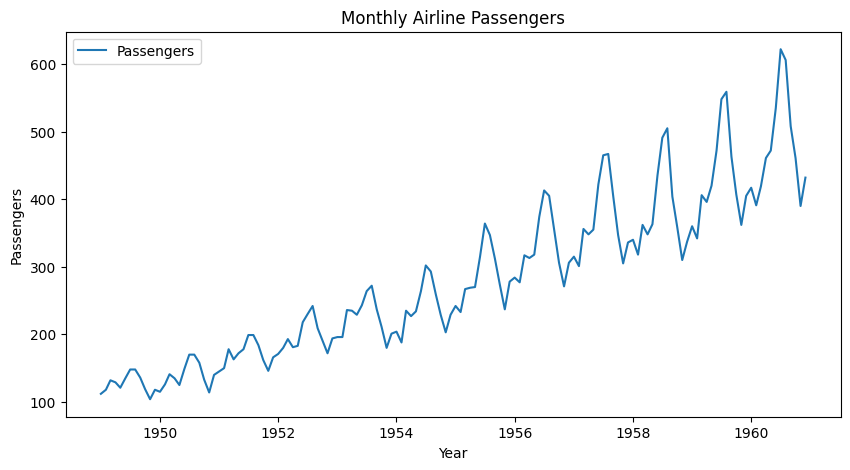

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ts, label="Passengers")
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

## Train-test split


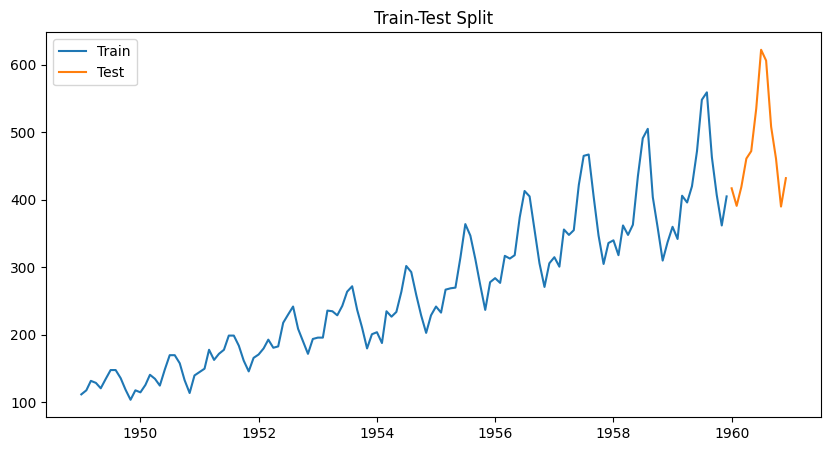

In [8]:
train = ts[:-12]
test = ts[-12:]

plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.title("Train-Test Split")
plt.legend()
plt.show()


## Model Fitting

In [9]:
arima_model = ARIMA(train, order=(2,1,2))
arima_fit = arima_model.fit()

print(arima_fit.summary())


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -607.782
Date:                Tue, 04 Nov 2025   AIC                           1225.563
Time:                        23:46:08   BIC                           1239.939
Sample:                    01-01-1949   HQIC                          1231.405
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6660      0.024     68.561      0.000       1.618       1.714
ar.L2         -0.9294      0.022    -41.536      0.000      -0.973      -0.886
ma.L1         -1.8324      0.032    -56.857      0.0

## Forecast

In [10]:
forecast = arima_fit.forecast(steps=12)


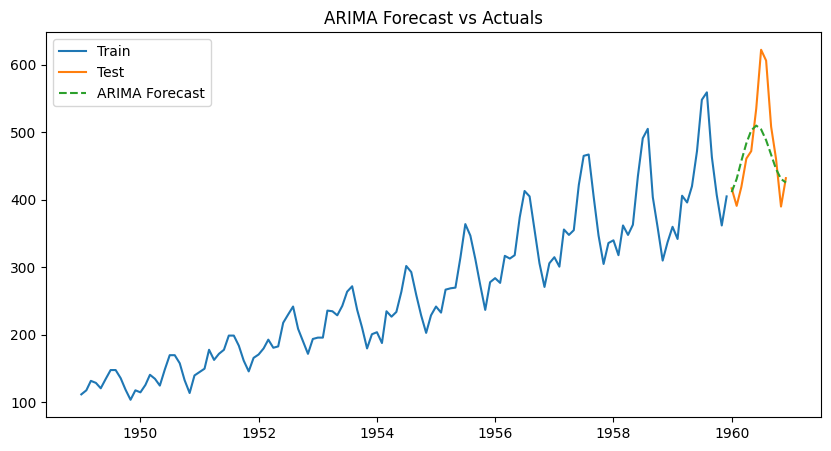

In [11]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="ARIMA Forecast", linestyle="--")
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()

In [12]:
comparison = pd.DataFrame({
    "Actual": test.values,
    "ARIMA_Forecast": forecast.values
}, index=test.index)

print("\nComparison Table:")
print(comparison)



Comparison Table:
            Actual  ARIMA_Forecast
Month                             
1960-01-01     417      411.312453
1960-02-01     391      430.812660
1960-03-01     419      457.433604
1960-04-01     461      483.661491
1960-05-01     472      502.616753
1960-06-01     535      509.821046
1960-07-01     622      504.207053
1960-08-01     606      488.158646
1960-09-01     508      466.639307
1960-10-01     461      445.702753
1960-11-01     390      430.821634
1960-12-01     432      425.487308
